### CatBoost

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevidir.

In [20]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

In [6]:
catboost_model = CatBoostClassifier(random_state=17,verbose=False)

In [7]:
cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy","f1","roc_auc"])

In [8]:
cv_results['test_accuracy'].mean()

0.7735251676428148

In [9]:
cv_results['test_f1'].mean()

0.6502723851348231

In [11]:
cv_results["test_roc_auc"].mean()

0.8378923829489867

In [12]:
cat_params= {"iterations":[200,500],
             "learning_rate":[0.01,0.1],
             "depth":[3,6]}

In [13]:
cat_best_grid = GridSearchCV(catboost_model,cat_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [14]:
catboost_final = catboost_model.set_params(**cat_best_grid.best_params_,random_state=17).fit(X,y)

In [15]:
cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy","f1","roc_auc"])

In [16]:
cv_results['test_accuracy'].mean()

0.7721755368814192

In [18]:
cv_results['test_f1'].mean()

0.6322580676028952

In [17]:
cv_results["test_roc_auc"].mean()

0.842001397624039

In [19]:
# Feature Importance bölümü

In [21]:
def plot_importance(model,features,num=len(X),save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,"Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig("importances.png")

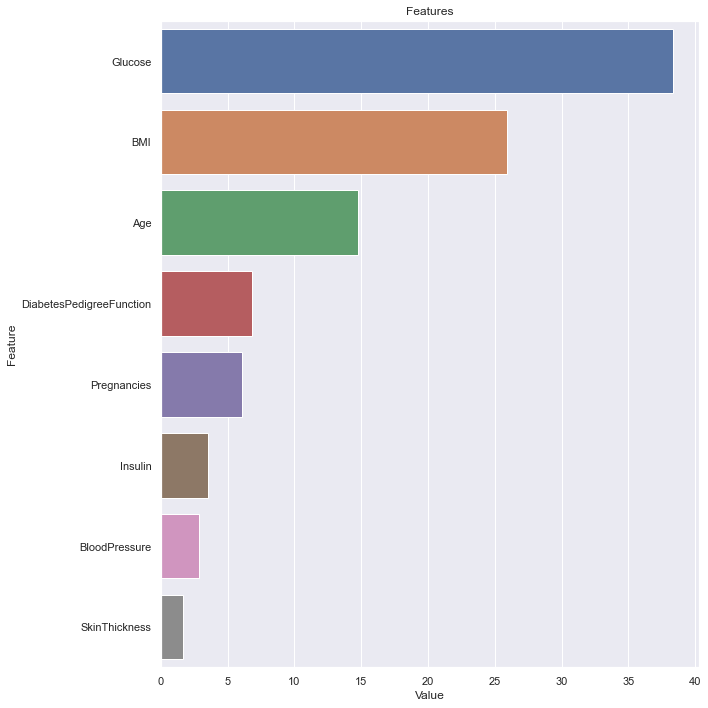

In [22]:
plot_importance(catboost_final,X)